In [39]:
import pandas as pd
import numpy as np

In [40]:
#abrimos el csv sobre las temperaturas de Madrid entre 1997 y 2015
temperatura = pd.read_csv('/home/vicente/Downloads/weather_madrid_LEMD_1997_2015.csv')

In [41]:
#vemos el dataframe y utilizamos la variable día como índice del data
temperatura.head()
temperatura.set_index('CET',  inplace = True)

In [49]:
temperatura.head()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees,soleado
CET,,,,,,,,,,,,,,,,,,,,,
1997-1-1,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,229,1
1997-1-2,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,143,0
1997-1-3,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,256,0
1997-1-4,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,284,1
1997-1-5,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,2,0


In [42]:
#analizamos el tipo de variable 
temperatura.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6812 entries, 1997-1-1 to 2015-12-31
Data columns (total 22 columns):
Max TemperatureC               6810 non-null float64
Mean TemperatureC              6809 non-null float64
Min TemperatureC               6810 non-null float64
Dew PointC                     6810 non-null float64
MeanDew PointC                 6810 non-null float64
Min DewpointC                  6810 non-null float64
Max Humidity                   6810 non-null float64
 Mean Humidity                 6810 non-null float64
 Min Humidity                  6810 non-null float64
 Max Sea Level PressurehPa     6812 non-null int64
 Mean Sea Level PressurehPa    6812 non-null int64
 Min Sea Level PressurehPa     6812 non-null int64
 Max VisibilityKm              5872 non-null float64
 Mean VisibilityKm             5872 non-null float64
 Min VisibilitykM              5872 non-null float64
 Max Wind SpeedKm/h            6812 non-null int64
 Mean Wind SpeedKm/h           6812 non-null 

In [43]:
#utilizamos la variable Events para ver los días que no ha hecho soleado, 
set(temperatura[" Events"])

{'Fog',
 'Fog-Rain',
 'Fog-Rain-Snow',
 'Fog-Rain-Thunderstorm',
 'Fog-Snow',
 'Fog-Thunderstorm',
 'Rain',
 'Rain-Hail',
 'Rain-Hail-Thunderstorm',
 'Rain-Snow',
 'Rain-Snow-Thunderstorm',
 'Rain-Thunderstorm',
 'Snow',
 'Thunderstorm',
 'Tornado',
 nan}

In [44]:
#Suponemos que los días que no se ha registrado ningún evento es que ha hecho soleado, por lo que convertimos los nan en soleados
temperatura[' Events'] = temperatura[' Events'].fillna('soleado')
set(temperatura[" Events"])

{'Fog',
 'Fog-Rain',
 'Fog-Rain-Snow',
 'Fog-Rain-Thunderstorm',
 'Fog-Snow',
 'Fog-Thunderstorm',
 'Rain',
 'Rain-Hail',
 'Rain-Hail-Thunderstorm',
 'Rain-Snow',
 'Rain-Snow-Thunderstorm',
 'Rain-Thunderstorm',
 'Snow',
 'Thunderstorm',
 'Tornado',
 'soleado'}

In [45]:
#creamos una nueva columna en la que 1 es soleado y 0 otro tiempo y elinamos la columna Events
soleado = []
for i in temperatura[" Events"]:
    if i != "soleado":
        soleado.append(0)
    else:
        soleado.append(1)

temperatura["soleado"]= soleado
temperatura["soleado"].value_counts()
temperatura.drop([" Events"], axis = 1, inplace = True)

1    5014
0    1798
Name: soleado, dtype: int64

In [48]:
#analizamos las correlaciones entre las distintas variables numéricas 
correlacion = temperatura.corr()
correlacion

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees,soleado
Max TemperatureC,1.000000,0.970983,0.856143,0.583509,0.495857,0.329547,-0.718184,-0.805961,-0.761490,-0.081856,...,0.126435,0.299083,0.388285,0.025244,-0.073119,-0.135634,-0.068196,-0.449610,0.000365,0.317706
Mean TemperatureC,0.970983,1.000000,0.951917,0.691818,0.615279,0.448551,-0.695012,-0.742891,-0.663245,-0.191302,...,0.111687,0.251678,0.324891,0.114279,0.031273,-0.050422,-0.036425,-0.345945,-0.028099,0.205885
Min TemperatureC,0.856143,0.951917,1.000000,0.774345,0.719411,0.566974,-0.609253,-0.601402,-0.480082,-0.320240,...,0.060010,0.152724,0.209503,0.216444,0.160338,0.065168,0.002736,-0.182263,-0.063438,0.047050
Dew PointC,0.583509,0.691818,0.774345,1.000000,0.944158,0.810374,-0.067080,-0.099535,-0.083950,-0.269354,...,0.021202,-0.007272,-0.046049,0.134826,0.026668,0.079647,0.078278,0.040980,-0.017147,-0.218671
MeanDew PointC,0.495857,0.615279,0.719411,0.944158,1.000000,0.927150,0.040494,0.035249,0.054067,-0.257814,...,-0.002864,-0.048571,-0.098862,0.071934,-0.017669,0.040261,0.081459,0.111029,-0.036015,-0.244280
Min DewpointC,0.329547,0.448551,0.566974,0.810374,0.927150,1.000000,0.151249,0.182515,0.223808,-0.217307,...,-0.038811,-0.102658,-0.154535,0.008618,-0.052743,0.007908,0.074127,0.187659,-0.035776,-0.269425
Max Humidity,-0.718184,-0.695012,-0.609253,-0.067080,0.040494,0.151249,1.000000,0.906844,0.728340,0.098442,...,-0.105546,-0.300061,-0.447324,-0.147063,-0.157770,0.020161,0.106557,0.449280,0.036646,-0.419425
Mean Humidity,-0.805961,-0.742891,-0.601402,-0.099535,0.035249,0.182515,0.906844,1.000000,0.919634,0.057736,...,-0.173519,-0.394684,-0.538315,-0.138509,-0.116879,0.073199,0.114354,0.572034,0.017532,-0.498376
Min Humidity,-0.761490,-0.663245,-0.480082,-0.083950,0.054067,0.223808,0.728340,0.919634,1.000000,-0.041456,...,-0.298171,-0.476237,-0.551916,-0.080813,-0.030248,0.124931,0.090661,0.610060,-0.022018,-0.506217
Max Sea Level PressurehPa,-0.081856,-0.191302,-0.320240,-0.269354,-0.257814,-0.217307,0.098442,0.057736,-0.041456,1.000000,...,0.031812,0.067799,0.066024,-0.417619,-0.380324,-0.371865,-0.102311,-0.201005,0.015054,0.305134


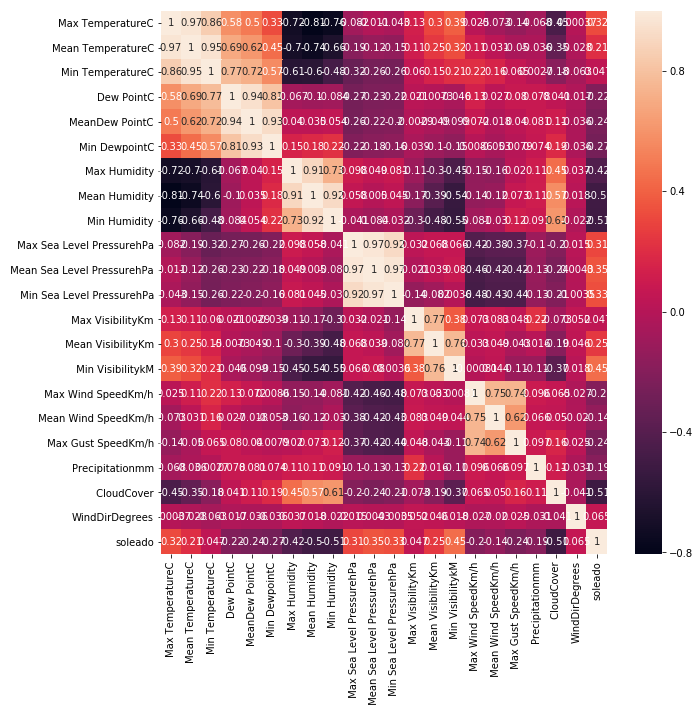

In [47]:
#visualizamos la relación de correlaciones entre las variables, se puede ver como existen fuertes relaciones entre las variables que están relacionados, ejemplo es máxima temperatura,mínima temperatura y media. Por lo que ante estos casos nos quedamos con la variable que utiliza la media de los datos
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(correlacion, annot=True)
ax

In [11]:
#eliminamos las variables
tempdrop= temperatura.drop(["Max TemperatureC","Min TemperatureC","Dew PointC","Min DewpointC","Max Humidity"," Min Humidity"," Max Sea Level PressurehPa"," Min Sea Level PressurehPa"," Max VisibilityKm"," Min VisibilitykM"], axis = 1, inplace = False)

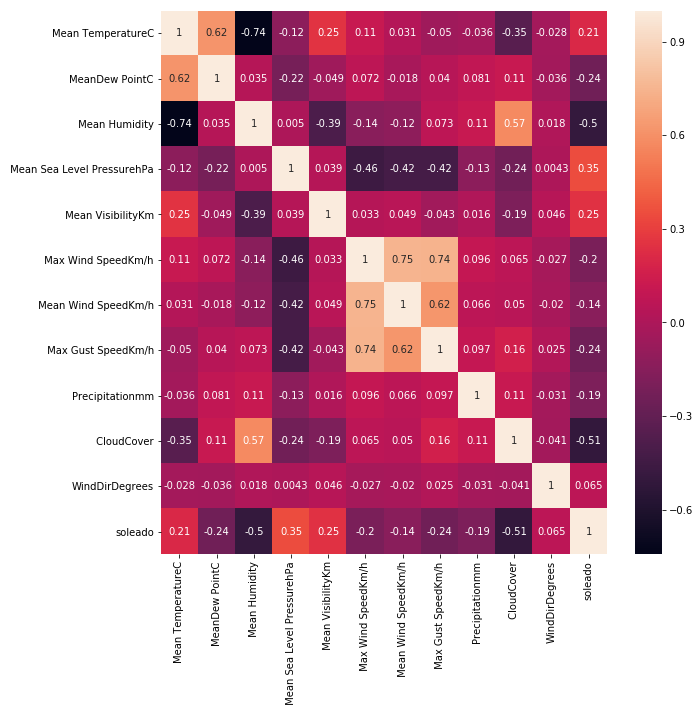

In [12]:
#verificamos como queda la correlación entre las variables
correlacion2 = tempdrop.corr()
fig, axdr = plt.subplots(figsize = (10,10))
axdr = sns.heatmap(correlacion2, annot=True)
axdr

In [13]:
#analizamos los nulos que tienen las variables 
tempdrop.isnull().sum()

Mean TemperatureC                 3
MeanDew PointC                    2
 Mean Humidity                    2
 Mean Sea Level PressurehPa       0
 Mean VisibilityKm              940
 Max Wind SpeedKm/h               0
 Mean Wind SpeedKm/h              0
 Max Gust SpeedKm/h            3306
Precipitationmm                   0
 CloudCover                    1372
WindDirDegrees                    0
soleado                           0
dtype: int64

In [14]:
#modelo eliminando columnas si supera mas de un 10% los nulos
nulosrating=tempdrop[" Mean VisibilityKm"].isna().sum()
proporcionrati= nulosrating/(len(tempdrop[" Mean VisibilityKm"]))
proporcionrati*100

13.799177921315325

In [15]:
tempdrop.drop([' Max Gust SpeedKm/h',' CloudCover',' Mean VisibilityKm'], axis = 1, inplace = True)

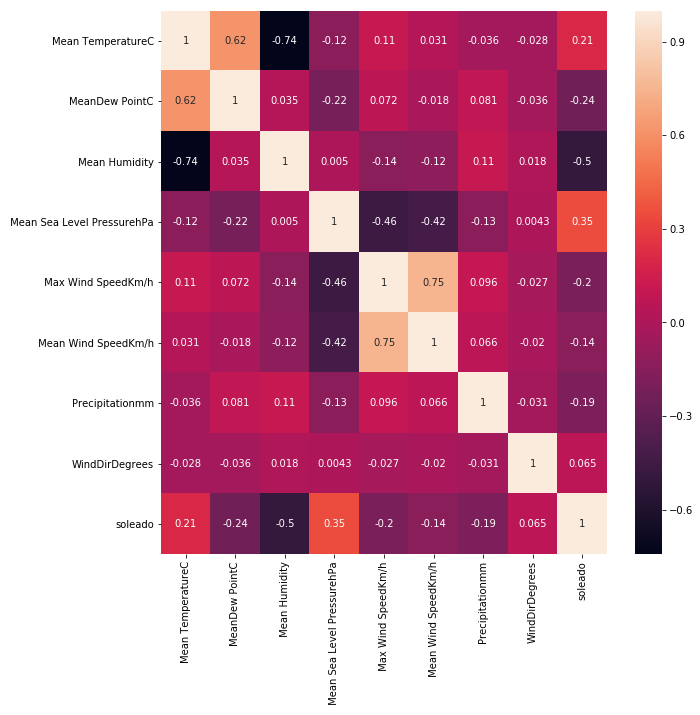

In [16]:
correlacion2 = tempdrop.corr()
fig, axdr = plt.subplots(figsize = (10,10))
axdr = sns.heatmap(correlacion2, annot=True)
axdr

In [17]:
tempdrop.dropna(inplace = True)

In [19]:
#Empezamos con los preparativos del modelo
X= tempdrop.drop(axis=1, labels=["soleado"])
y= tempdrop.soleado

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(5447, 8) (1362, 8) (5447,) (1362,)


In [21]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

lr = LogisticRegression(solver ='liblinear',max_iter=500)
cls = svm.SVC(gamma='auto', probability=True)
cls.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = cls.predict(X_test)
y_pred2 = lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.7393538913362702
Accuracy: 0.8502202643171806


In [23]:
from sklearn.metrics import confusion_matrix

c_matrix_cls = confusion_matrix(y_test, y_pred)
c_matrix_lr = confusion_matrix(y_test, y_pred2)
print(c_matrix_cls) 
print(c_matrix_lr)

[[   0  355]
 [   0 1007]]
[[231 124]
 [ 80 927]]


Confusion matrix, without normalization
[[   0  355]
 [   0 1007]]
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


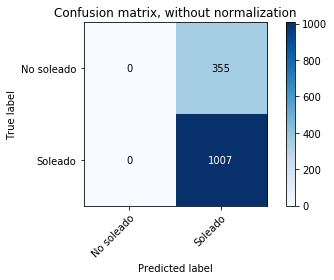

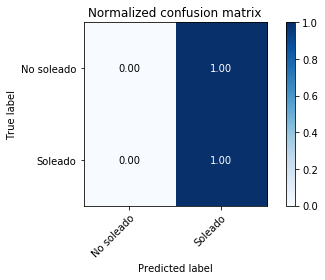

In [34]:
from sklearn.utils.multiclass import unique_labels

class_names = ['No soleado','Soleado']

def plot_confusion_matrix(y_true, y_pred_test, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_test)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred_test)]
    classes = class_names
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[231 124]
 [ 80 927]]
Normalized confusion matrix
[[0.65 0.35]
 [0.08 0.92]]


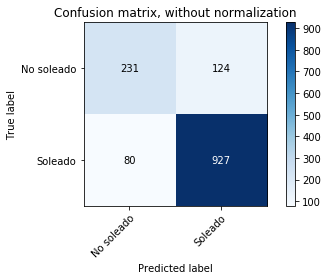

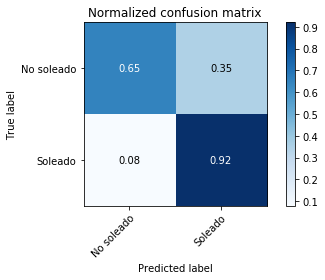

In [35]:
# Plot non-normalized confusion matrix logist
plot_confusion_matrix(y_test, y_pred2, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix logist
plot_confusion_matrix(y_test, y_pred2, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

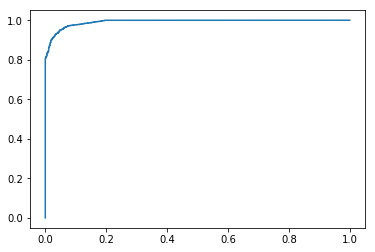

In [32]:
def plotMetricsCompare(X, y, cls):
    cls.fit(X_train, y_train)
    y_pred = cls.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred)
    auc = metrics.roc_auc_score(y, y_pred)
    plt.plot(fpr,tpr)
plotMetricsCompare(X, y, cls)

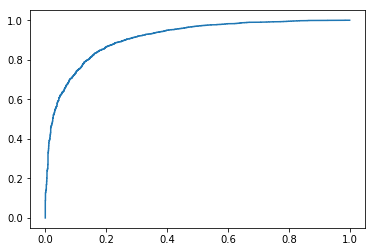

In [33]:
plotMetricsCompare(X, y, lr)